In [1]:
#Now importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("employee_data (1).csv")
print("The Data exported successfully")

The Data exported successfully


In [4]:
data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [5]:
#now displaying the information of the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [7]:
data.drop_duplicates(inplace=True)
data.fillna(data.mean(numeric_only=True),inplace=True)
data.fillna(data.mode().iloc[0],inplace=True)

In [8]:
#Now performing the Exploratorty data analysis

In [9]:
#We are performing it with matplotlib, seaborn 

In [10]:
data.describe(include="all")

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
count,100.000000,100,100.000000,100,100.000000,100.000000,100.000000,100
unique,NaN,98,NaN,4,NaN,NaN,NaN,2
top,NaN,James Walker,NaN,Engineering,NaN,NaN,NaN,No
freq,NaN,2,NaN,28,NaN,NaN,NaN,61
mean,50.500000,NaN,36.570000,NaN,72820.000000,10.800000,84.940000,NaN
std,29.011492,NaN,8.318478,NaN,12643.823102,6.361183,6.349771,NaN
min,1.000000,NaN,25.000000,NaN,43000.000000,1.000000,70.000000,NaN
25%,25.750000,NaN,29.750000,NaN,65000.000000,5.000000,80.000000,NaN
50%,50.500000,NaN,35.000000,NaN,72000.000000,10.000000,85.500000,NaN
75%,75.250000,NaN,41.250000,NaN,82750.000000,16.000000,90.000000,NaN


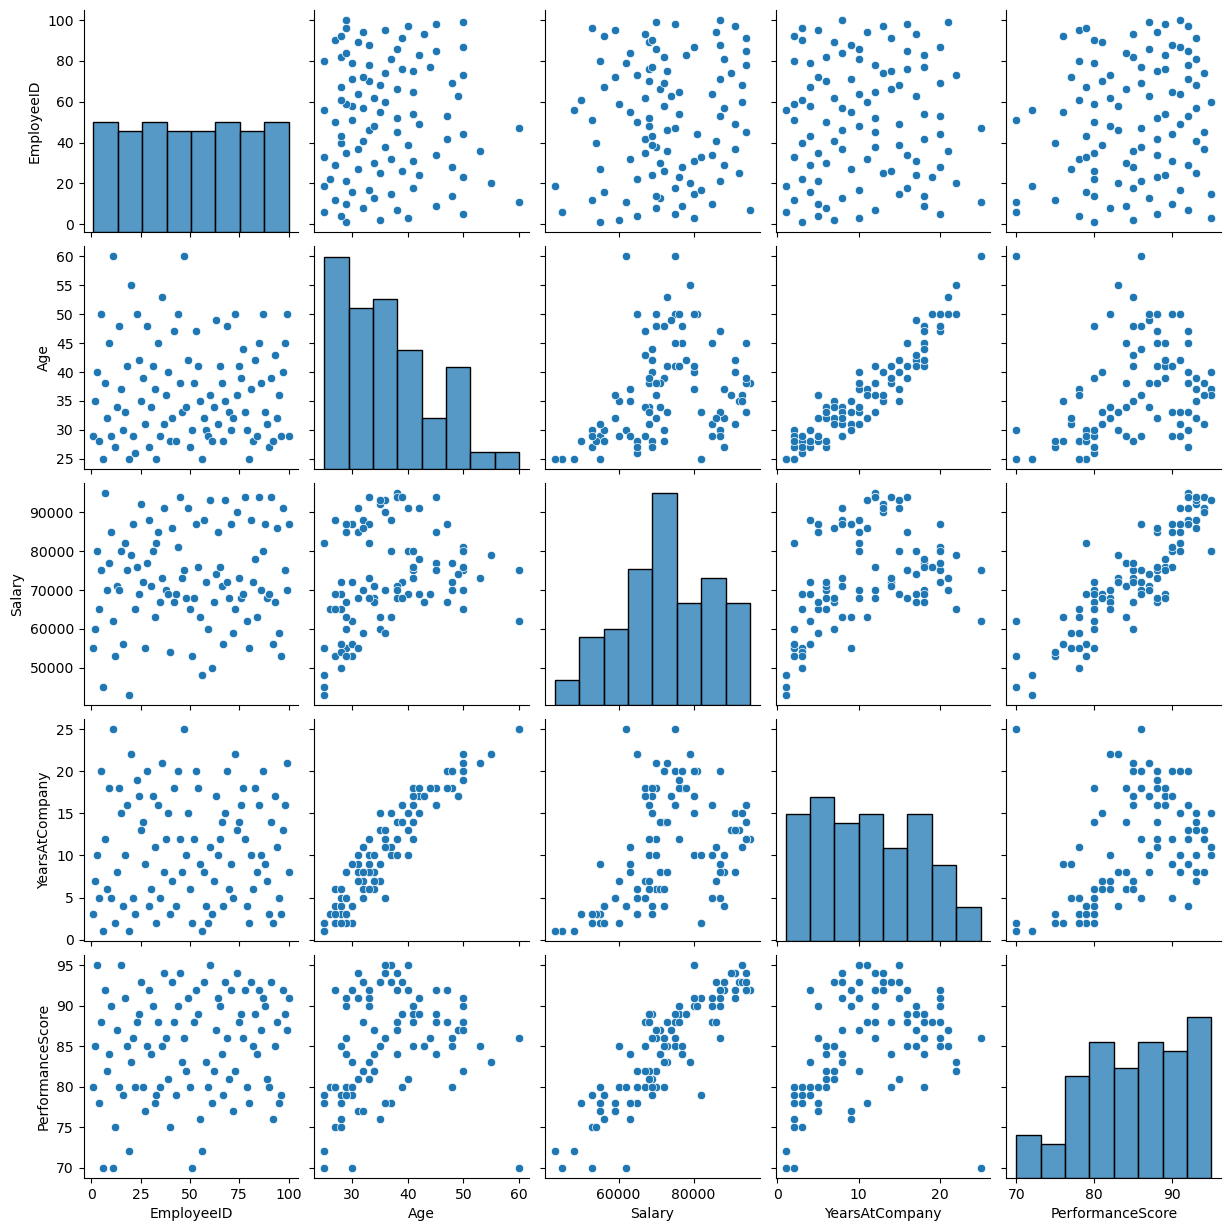

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()

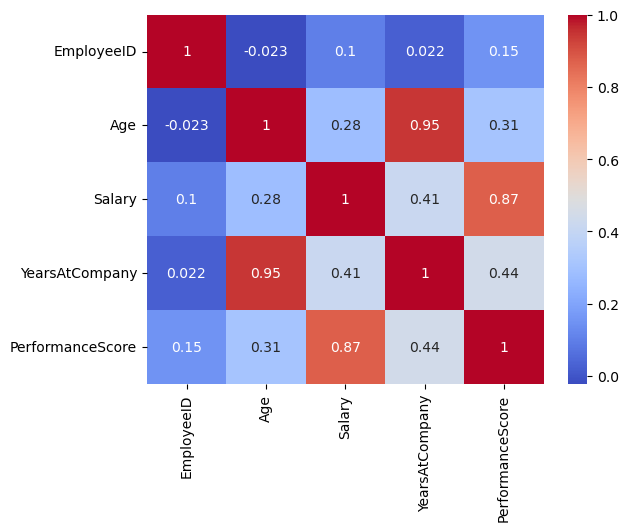

In [13]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

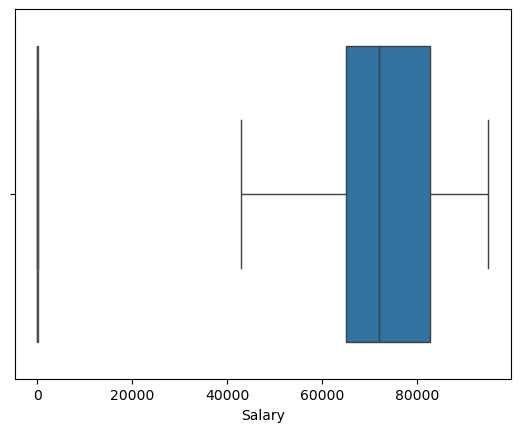

In [18]:
#Identify the outliers
# x to y represents a cateogrical and a numerical variable
# x or only y is a variable distriubtions
sns.boxplot(data,x='Salary')
sns.boxplot(data,x='PerformanceScore')
plt.show()

In [19]:
#Probability and statistical Analysis

In [20]:
#Probability of attrition

In [23]:
prob_attrition=data['Attrition'].value_counts(normalize=True)
print(prob_attrition)

Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64


In [25]:
#Conditional Probablity (Attrition given department)
pd.crosstab(data['Department'],data['Attrition'],normalize='index')

Attrition,No,Yes
Department,,
Engineering,0.571429,0.428571
HR,0.653846,0.346154
Marketing,0.800000,0.200000
Sales,0.461538,0.538462


In [26]:
#Employee Attribution Prediction(Classification)
#We generally implement this throguh sklearn.model_selection,sklearn.ensemble,sklearn.metric

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.62      0.71      0.67         7

    accuracy                           0.75        20
   macro avg       0.73      0.74      0.73        20
weighted avg       0.76      0.75      0.75        20



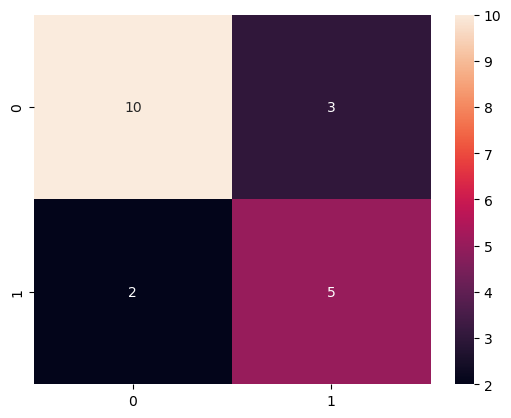

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

X=data.drop(['Attrition', 'EmployeeID', 'Name'],axis=1)
y=data['Attrition']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

R2: 0.7487625823958759
MSE: 12.828182542866577


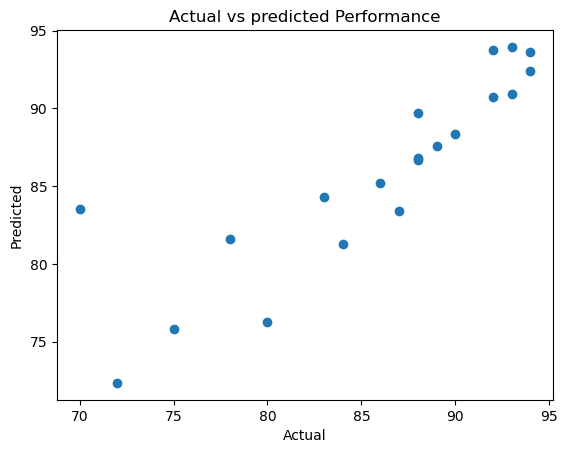

In [39]:
#Employee Performance Prediction (Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

X=data.drop(['PerformanceScore', 'EmployeeID', 'Name'],axis=1)
y=data['PerformanceScore']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

reg=LinearRegression()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)
print("R2:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted Performance')
plt.show()

In [42]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 2.0 MB/s eta 0:02:49
   ---------------------------------------- 1.6/332.0 MB 2.3 MB/s eta 0:02:22
   ---------------------------------------- 2.4/332.0 MB 2.8 MB/s eta 0:02:00
   ---------------------------------------- 3.1/332.0 MB 2.9 MB/s eta 0:01:56
   ---------------------------------------- 3.9/332.0 MB 3.0 MB/s eta 0:01:49
    --------------------------------------- 4.7/332.0 MB 3.2 MB/s eta 0:01:43
    --------------------------------------- 5.8/332.0 MB 3.3 MB/s eta 0:01:38
    --------------------------------------- 6.6/332.0 MB 3.5 MB/s eta 0:01:35
    --------------------------------------- 7.6/332.0 MB 3.5 MB/s eta 0:01:32
   - -------------------------------------- 8.4/332.0 MB 3.6 MB/s eta 0:01:31
   - --

In [44]:
#Deep Learning Models

#Neural Network Performance Prediction

#We are using the libraries that is Tensorflow / Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


C:\Users\saksh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - loss: 50067412.0000 - val_loss: 35596356.0000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 32906044.0000 - val_loss: 21716400.0000
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 19636742.0000 - val_loss: 11505630.0000
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 9916522.0000 - val_loss: 4794105.0000
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 3797232.5000 - val_loss: 1178450.6250
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 729284.8750 - val_loss: 14371.1396
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 49521.9258 - val_loss: 457661.5000
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 758995.2500 - val_loss: 1614382.0000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 1971216.2500 - val_loss: 2715314.2500
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 2986308.5000 - val_loss: 3292203.0000
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - los

In [46]:
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 614.0923


614.09228515625

In [49]:
#Neural Network For Atrribition Classification

model2=Sequential([
    Dense(32,activation='relu',input_dim=X_train.shape[1]),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50


C:\Users\saksh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.0000e+00 - loss: 708396.5000 - val_accuracy: 0.0000e+00 - val_loss: 640917.5000
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0000e+00 - loss: 609655.2500 - val_accuracy: 0.0000e+00 - val_loss: 539982.1250
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.0000e+00 - loss: 509810.6562 - val_accuracy: 0.0000e+00 - val_loss: 439601.1875
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0000e+00 - loss: 411750.7812 - val_accuracy: 0.0000e+00 - val_loss: 350648.7500
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.0000e+00 - loss: 326819.7812 - val_accuracy: 0.0000e+00 - val_loss: 268453.7188
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.0000e+00 - loss: 245984.8438 - val_accuracy: 0.0000e+00 - val_loss: 185699.5312
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0000e+00 - loss: 163447.9688 - val_accuracy: 0.0000e+00 - val_loss: 102753.6094
Epoch 8/5

In [52]:
import seaborn as sns

<Axes: xlabel='Department', ylabel='Attrition'>

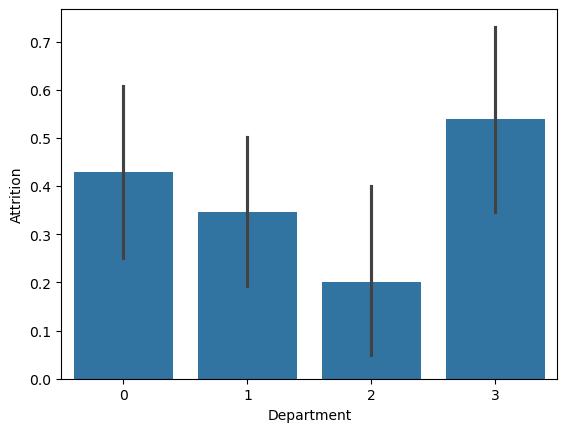

In [56]:
sns.barplot(x='Department', y='Attrition', data=data)


<Axes: xlabel='Salary', ylabel='PerformanceScore'>

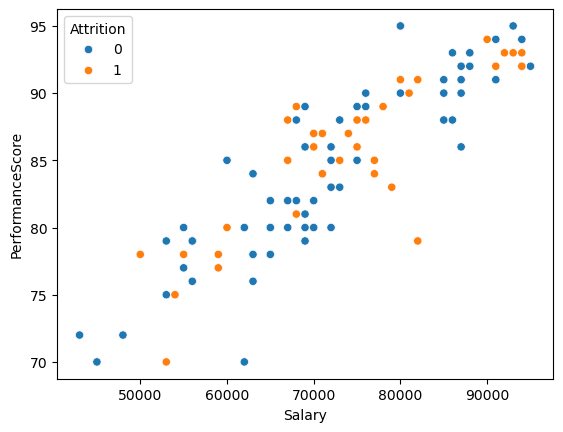

In [59]:
sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=data)



In [60]:
#Reporting and insights in the following project

Department with highest attrition.
Relationship between salary and performance.
Predictors of retention (e.g experience,salary)

We can increase the salary in the sales department
We can launch the mentorship programs for new employees